In [1]:
import pickle
import matplotlib.pyplot as plt
from collections import namedtuple

Stat = namedtuple('Stat', ['losses', 'accs'])

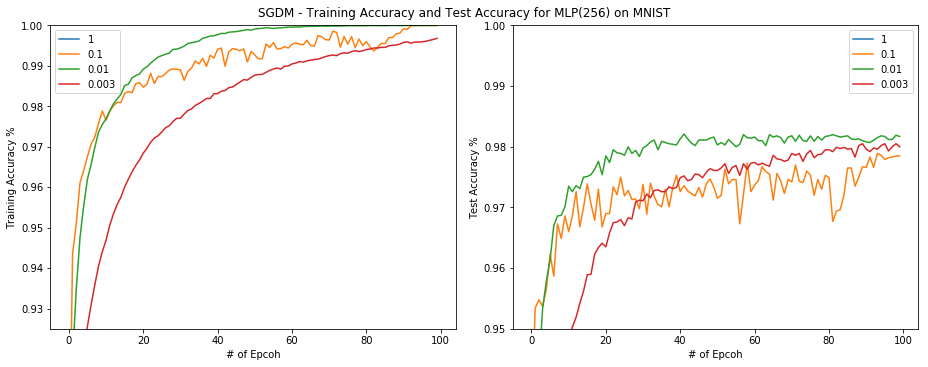

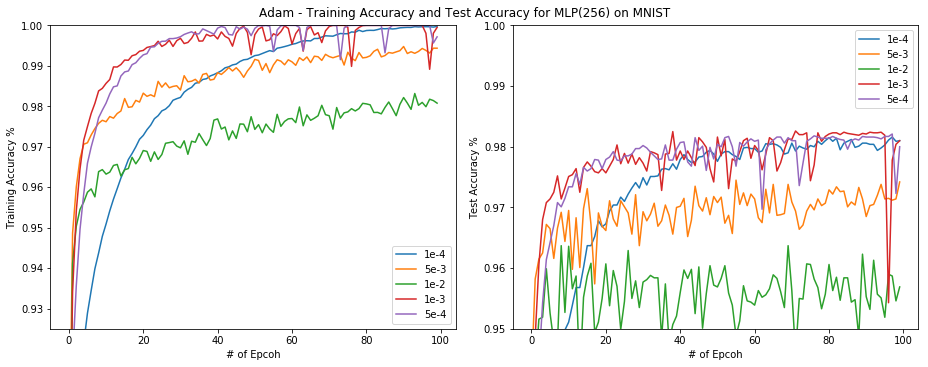

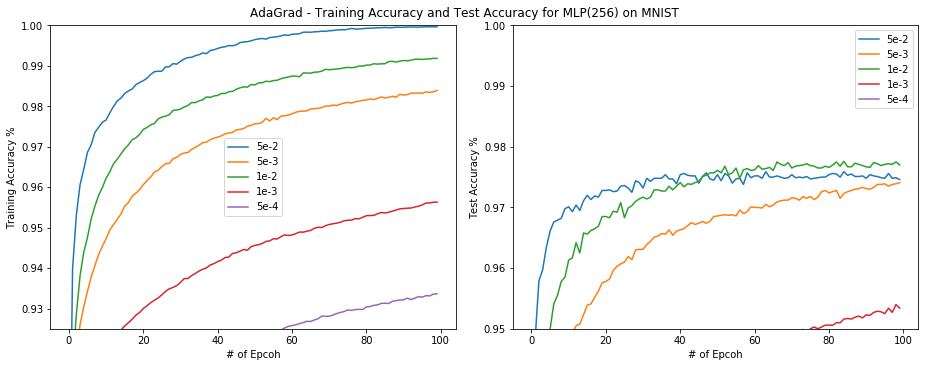

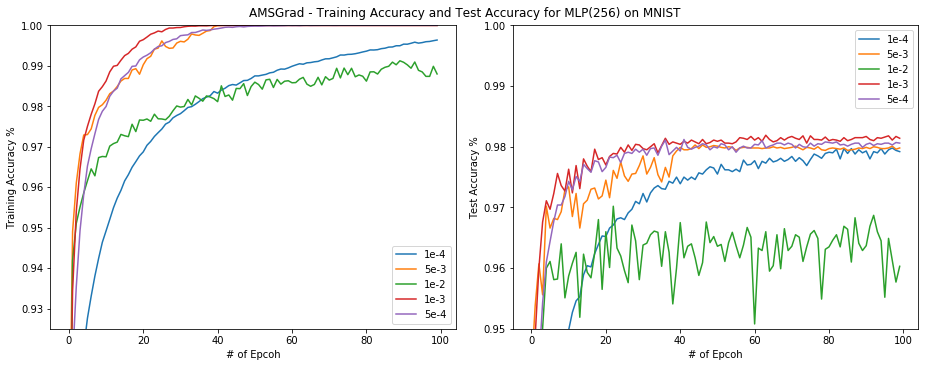

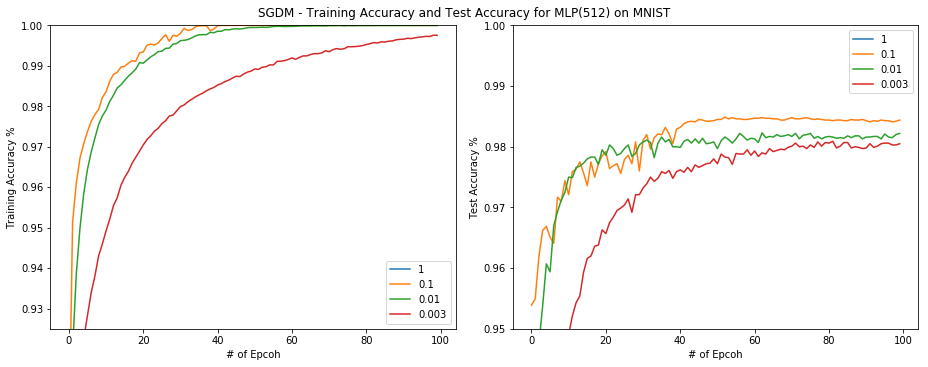

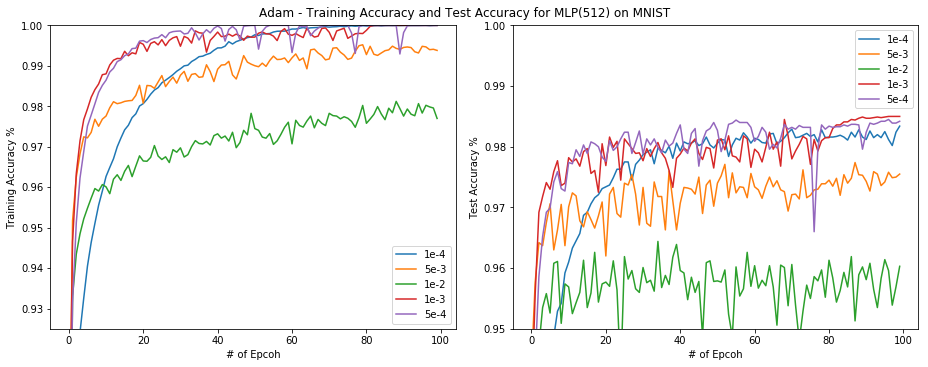

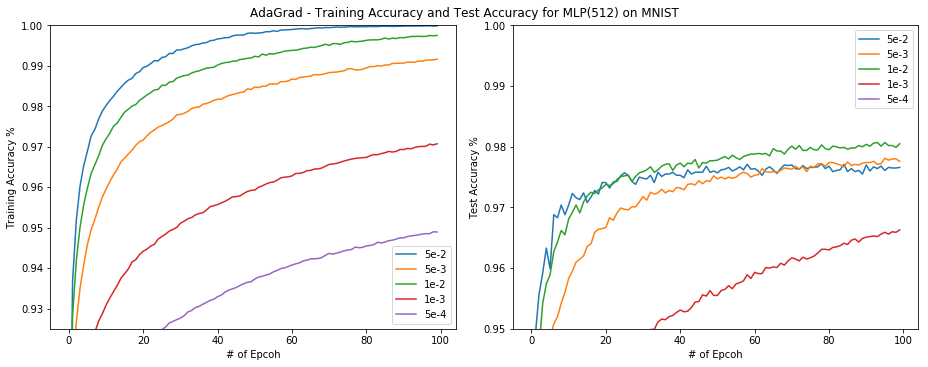

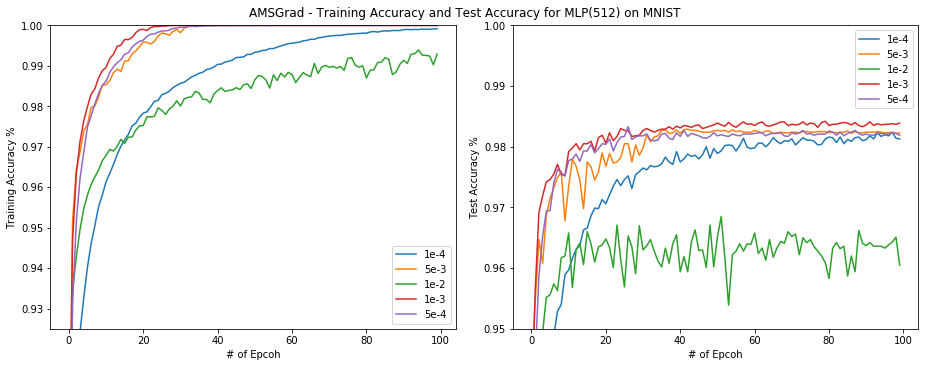

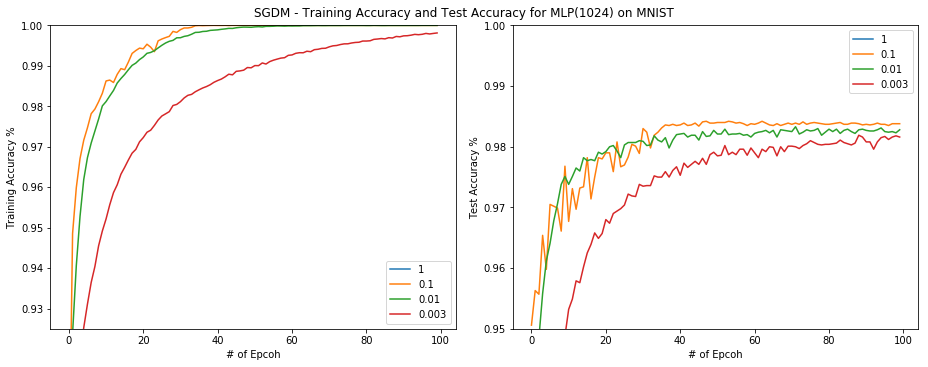

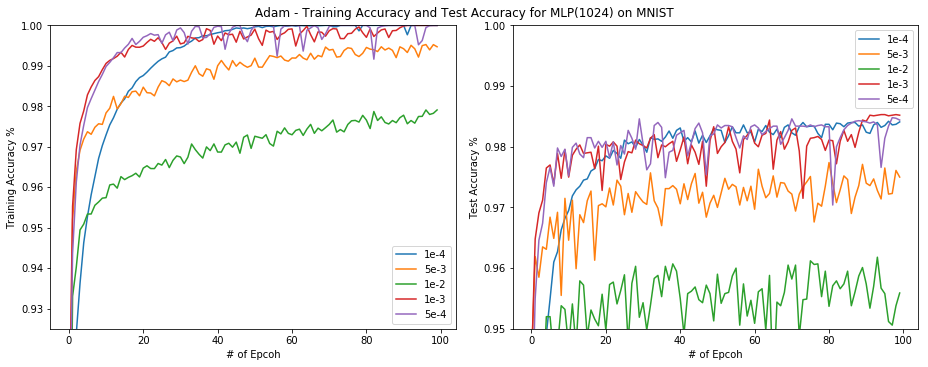

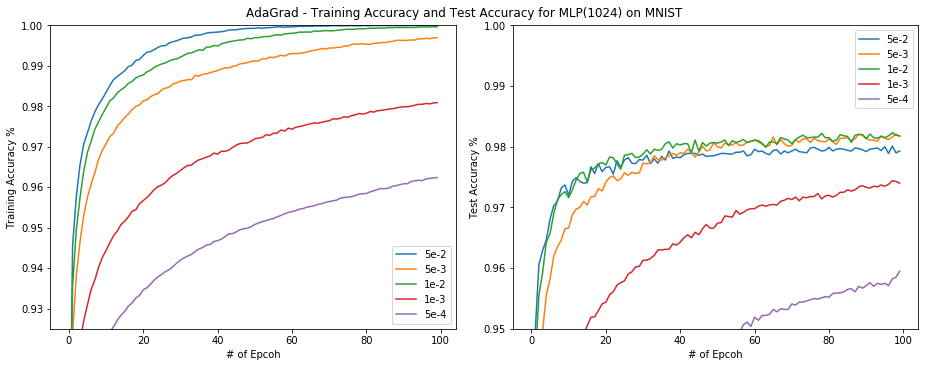

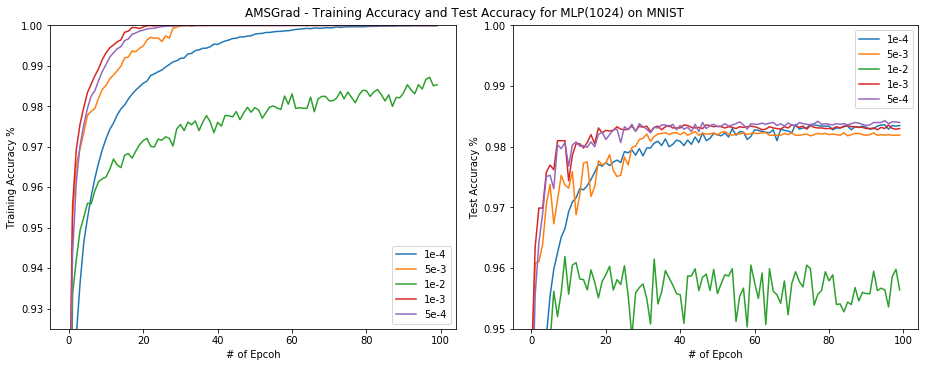

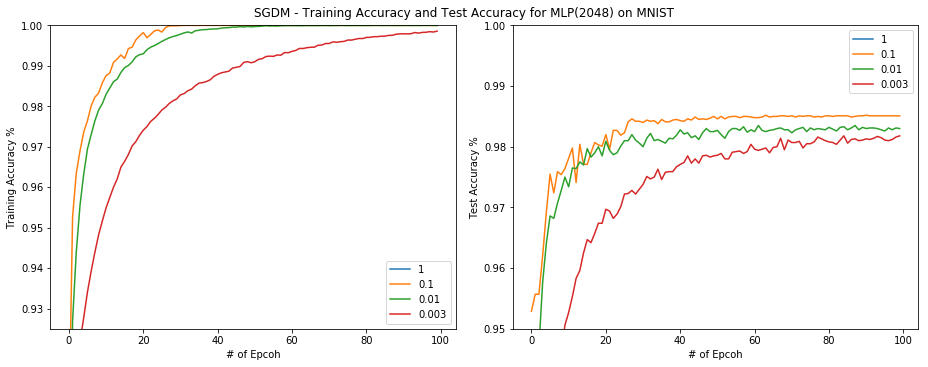

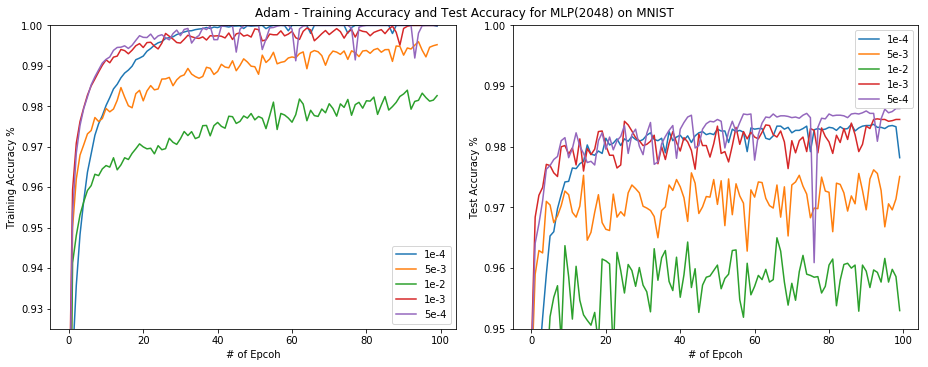

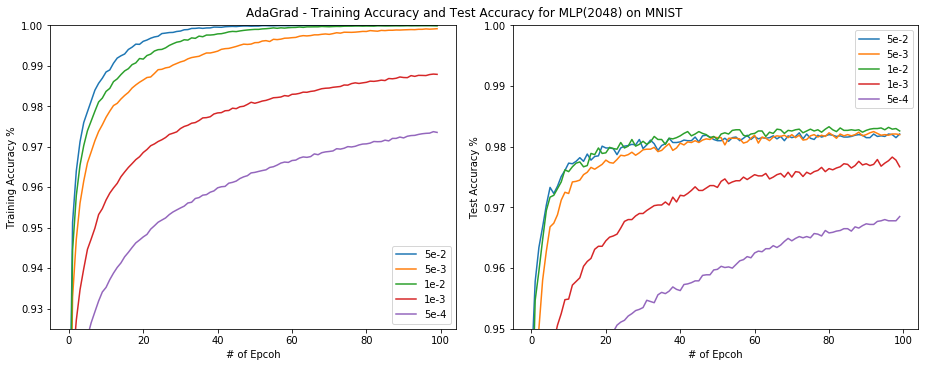

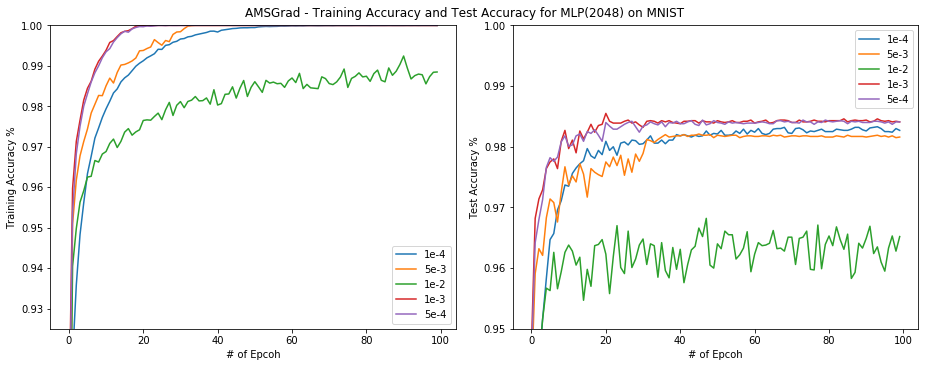

In [2]:
for h_size in [256, 512, 1024, 2048]:
    for prefix in ['SGDM', 'Adam', 'AdaGrad', 'AMSGrad']:
        with open(f'{prefix.lower()}_stat_mlp_{h_size}.pkl', 'rb') as f:
            stat = pickle.load(f)

        # Plot accuracy 
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))
        for lr in stat['train']:
            ax1.plot(stat['train'][lr].accs, label=lr)
        ax1.set_ylabel('Training Accuracy %')
        ax1.set_xlabel('# of Epcoh')
        ax1.set_ylim(0.925, 1)
        ax1.legend()

        for lr in stat['test']:
            ax2.plot(stat['test'][lr].accs, label=lr)
        ax2.set_ylabel('Test Accuracy %')
        ax2.set_xlabel('# of Epcoh')
        ax2.set_ylim(0.95, 1)
        ax2.legend()

        plt.suptitle(f'{prefix} - Training Accuracy and Test Accuracy for MLP({h_size}) on MNIST', y=1.01)
        plt.tight_layout()
        plt.show()